In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
font = {'family' : 'sans-serif',
        'weight' : 'light',
        'size'   : '6'}

plt.rc('font', **font)

In [7]:
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

In [2]:
data = pd.read_table("CpGi_WT_brain_referencepoint.dat")

In [6]:
df = data.T 
df.columns = df.iloc[0].values
min1kb = df.index.get_loc("-1.0Kb")
plus1kb = df.index.get_loc("1.0Kb")
center = df.index.get_loc("TSS")

In [15]:
def do_plot(df, min1kb, plus1kb, center):
    x_ax = np.arange(0, len(df)-2)
    x_tick_loc = [min1kb-2, center-2, plus1kb-2]
    y_ax_label = "MNase (RPKM)"
    x_tick_labels = ["-1.0Kb", "Center", "1.0Kb"]
    yy =[]
    yes5fc = df.iloc[2:, 1::2]
    no5fc = df.iloc[2:, 2::2]
    
    yy.append(yes5fc[["WT_A1"]].sum(axis=1))
    yy.append(no5fc[["WT_A1"]].sum(axis=1))
    legend = ["5fC", "no5fC"]
    num_plots = 1
    f, ax = plt.subplots(num_plots, 1, figsize=(cm2inch(5.3,3.5)), dpi=120)
    ax.set_xticks(x_tick_loc)
    ax.set_xticklabels(x_tick_labels)
    ax.set_ylabel(y_ax_label)
    #colors = ["red", "blue"]
    for y, l in zip(yy, legend):
        ax.plot(x_ax, y, linewidth=1.2, label=l)
    legend = ax.legend(loc='upper left', frameon=False)
    ax.set_ylabel(y_ax_label)
    plt.tight_layout()
    plt.savefig("5fC_vs_no5fC_CpGi.pdf")

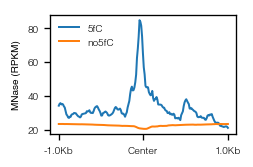

In [16]:
do_plot(df, min1kb, plus1kb, center)